## Sweet Cluster O'Mine: Uma abordagem de aprendizado de máquina não supervisionado para criação de listas de reprodução musicais em plataformas de streaming
### Aprendizado de Máquina 1 - 2020.1 - Trabalho 2
### Prof. Dr. Diego Furtado Silva
* João Gabriel Viana Hirasawa
* Juliana Ferreira Alves
* Matheus Malonda dos Santos Macaia
* Paulo Henrique Dal Bello
* Silvia Cristina de Jesus

# 1. Introdução

Introdução

# 2. Dados

Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
data = pd.read_csv('dados/data.csv')

df = data[data['year'] >= 2010]

df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
17606,0.434,2010,0.01510,['Bruno Mars'],0.637,220733,0.843,0,7BqBn9nzAq8spo5e7cZ0dJ,0.000000,5,0.0876,-5.413,1,Just the Way You Are,81,2010-10-05,0.0432,109.012
17607,0.795,2010,0.18500,['Train'],0.673,216773,0.886,0,4HlFJV71xXKIGcU3kRyttv,0.000000,1,0.0826,-4.440,0,"Hey, Soul Sister",83,2010-12-01,0.0431,97.012
17608,0.361,2010,0.00544,"['Waka Flocka Flame', 'Roscoe Dash', 'Wale']",0.760,263773,0.595,1,03tqyYWC9Um2ZqU0ZN849H,0.000000,1,0.2410,-6.366,1,No Hands (feat. Roscoe Dash & Wale),76,2010-10-01,0.0391,131.497
17609,0.504,2010,0.02750,['Miguel'],0.684,195373,0.603,0,0JXXNGljqupsJaZsgSbMZV,0.000311,11,0.1910,-8.127,0,Sure Thing,78,2010-11-26,0.0989,81.000
17610,0.065,2010,0.51200,['Bruno Mars'],0.523,217867,0.606,0,161DnLWsx1i3u1JT05lzqU,0.000000,1,0.1060,-4.754,0,Talking to the Moon,77,2010-10-05,0.0301,145.837


## 2.1. Análise Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21804 entries, 17606 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           21804 non-null  float64
 1   year              21804 non-null  int64  
 2   acousticness      21804 non-null  float64
 3   artists           21804 non-null  object 
 4   danceability      21804 non-null  float64
 5   duration_ms       21804 non-null  int64  
 6   energy            21804 non-null  float64
 7   explicit          21804 non-null  int64  
 8   id                21804 non-null  object 
 9   instrumentalness  21804 non-null  float64
 10  key               21804 non-null  int64  
 11  liveness          21804 non-null  float64
 12  loudness          21804 non-null  float64
 13  mode              21804 non-null  int64  
 14  name              21804 non-null  object 
 15  popularity        21804 non-null  int64  
 16  release_date      21804 non-null  o

In [ ]:
df.duplicated(subset=['artists', 'name']).sum()

1201

In [ ]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,21804.000000,21804.000000,21804.000000,21804.000000,2.180400e+04,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000,21804.000000
mean,0.460530,2015.004403,0.259982,0.606309,2.239833e+05,0.629218,0.288938,0.080806,5.199138,0.188530,-7.424226,0.642038,58.262888,0.102818,121.160507
std,0.240829,3.181665,0.292144,0.170930,8.894059e+04,0.219571,0.453279,0.235061,3.591470,0.153838,4.611710,0.479412,14.893296,0.108379,30.327837
min,0.000000,2010.000000,0.000000,0.000000,3.030100e+04,0.000020,0.000000,0.000000,0.000000,0.000000,-54.837000,0.000000,0.000000,0.000000,0.000000
25%,0.272000,2012.000000,0.024200,0.502750,1.862590e+05,0.496000,0.000000,0.000000,2.000000,0.097100,-8.473000,0.000000,53.000000,0.037000,97.120500
50%,0.447000,2015.000000,0.132000,0.619000,2.150325e+05,0.657000,0.000000,0.000002,5.000000,0.124000,-6.356000,1.000000,60.000000,0.054500,121.011000
75%,0.641000,2018.000000,0.426000,0.732000,2.479330e+05,0.799000,1.000000,0.000768,8.000000,0.231000,-4.855000,1.000000,67.000000,0.119000,140.266000
max,0.993000,2020.000000,0.996000,0.986000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,0.989000,1.023000,1.000000,100.000000,0.950000,220.099000


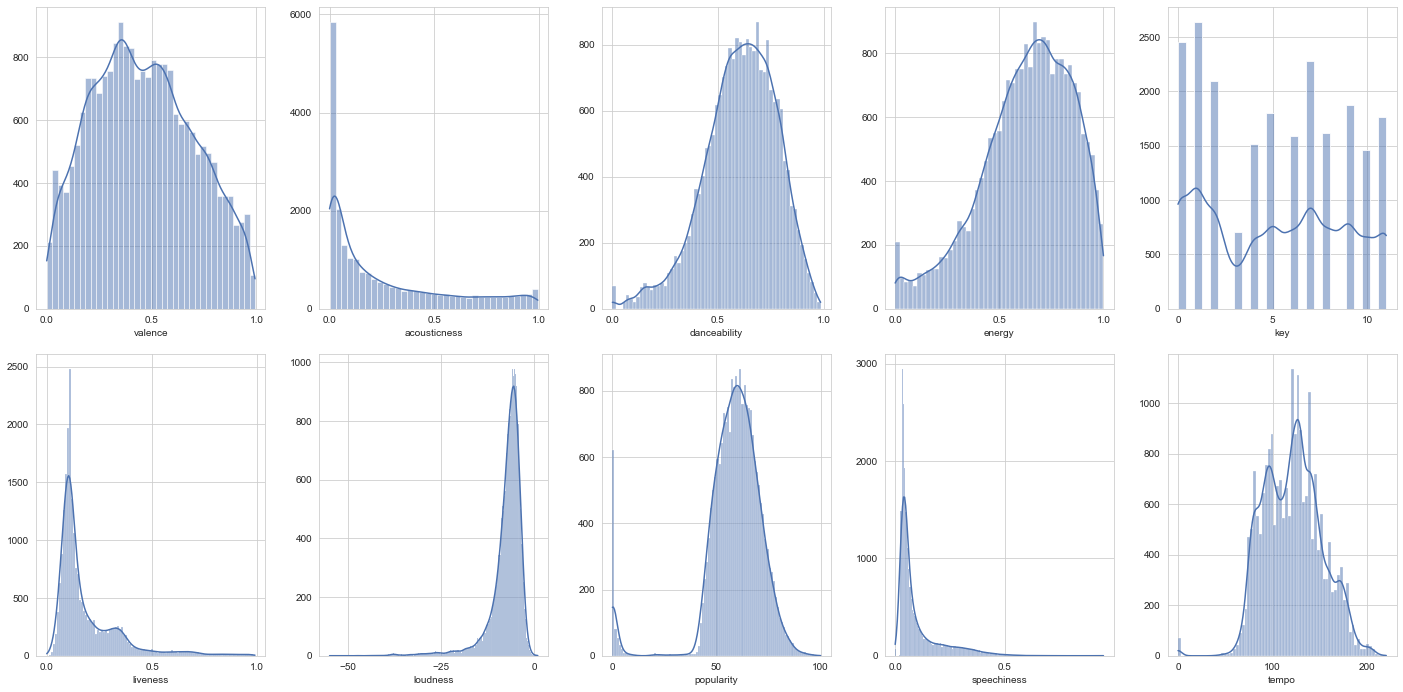

In [ ]:
cols = ['valence', 'acousticness', 'danceability', 'energy', 'key', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']

fig, axs = plt.subplots(2,5)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.set(font_scale=2)
plt.tight_layout()

for i, col in enumerate(cols):
  sns.histplot(df[col], ax=axs[i//5,i%5], kde=True, palette='YlGnBu_r')
  axs[i//5,i%5].set_ylabel('')

plt.savefig('graficos/dist.png')

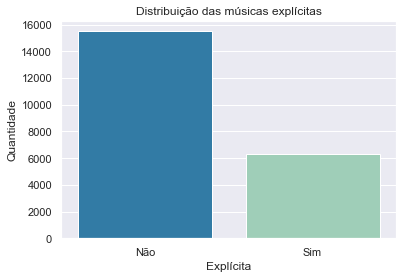

In [ ]:
sns.set(font_scale=1)
plt.tight_layout()
c = sns.countplot(x=df['explicit'].map({0:'Não', 1:'Sim'}),  palette='YlGnBu_r')
c.set(xlabel='Explícita', ylabel='Quantidade', title='Distribuição das músicas explícitas')

plt.savefig('graficos/dist_explicit.png')

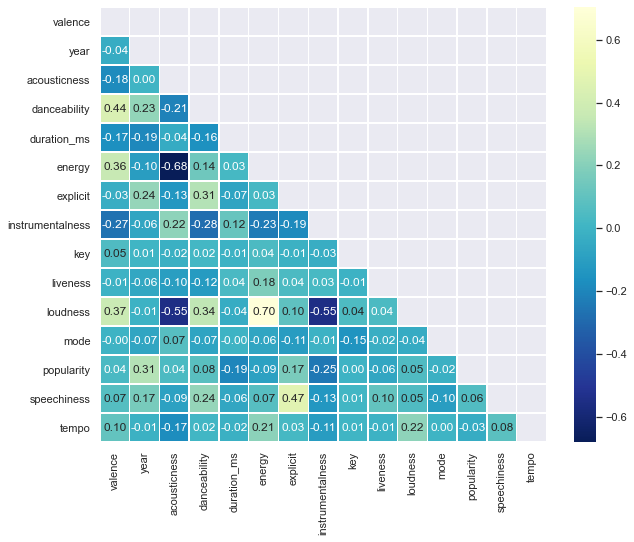

In [ ]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.set(font_scale=1)

h = sns.heatmap(corr, cmap='YlGnBu_r', annot=True, fmt='.2f', linewidths=.5, mask=mask)

# h.set(title='Mapa de calor das correlações dos atributos')
plt.savefig('graficos/heatmap_1.png')

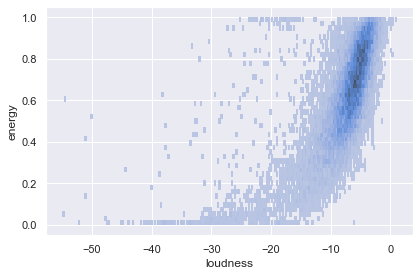

In [ ]:
cols = ['loudness','energy']

sns.histplot(x='loudness', y='energy', data=df, palette='YlGnBu_r')

plt.tight_layout()
plt.savefig('graficos/loudness_energy.png')

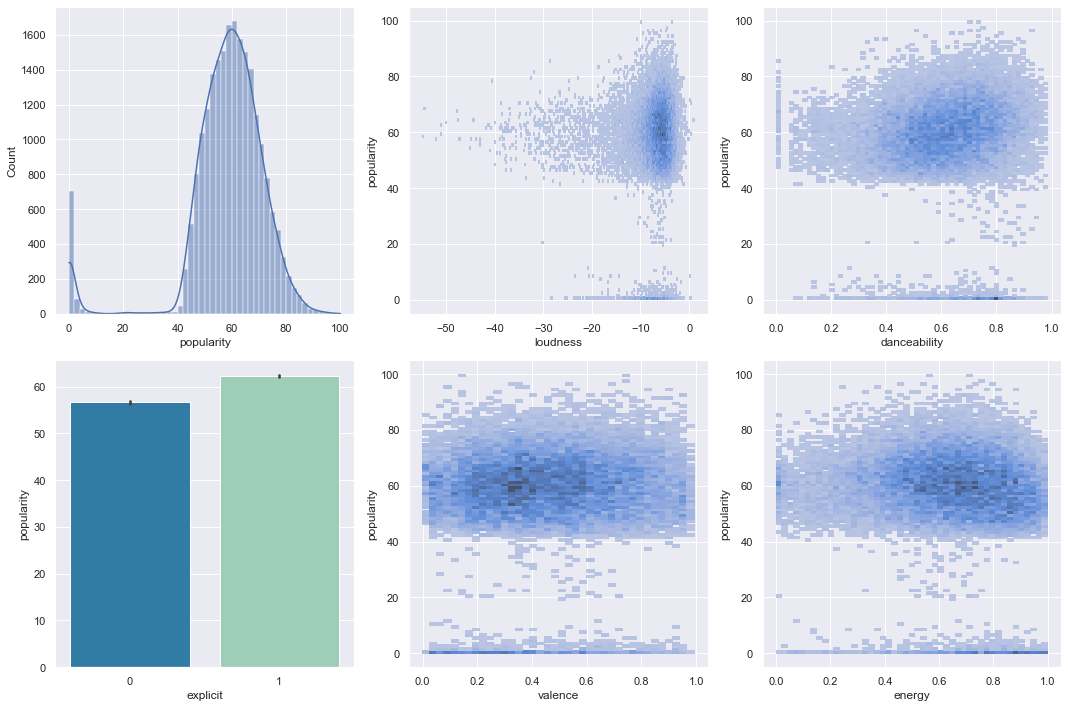

In [ ]:
cols = ['loudness', 'danceability', 'valence', 'energy']

fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(x='popularity', data=df, bins=50, kde=True, palette='YlGnBu_r', ax=axs[0,0])
sns.barplot(x='explicit', y='popularity', data=df, palette='YlGnBu_r', ax=axs[1,0])

for i, col in enumerate(cols):
  sns.histplot(x=col, y='popularity', data=df, ax=axs[i//2,i%2+1], palette='YlGnBu_r')

plt.tight_layout()
plt.savefig('graficos/popularity_all.png')

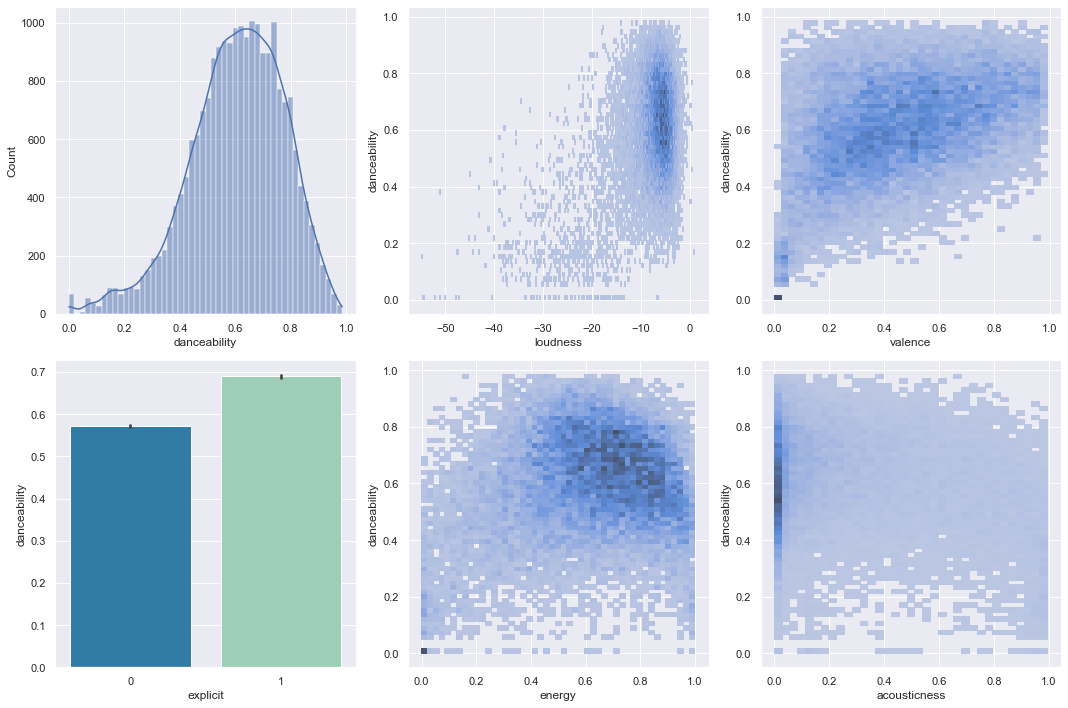

In [ ]:
cols = ['loudness', 'valence', 'energy', 'acousticness']

fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(x='danceability', data=df, bins=50, kde=True, palette='YlGnBu_r', ax=axs[0,0])
sns.barplot(x='explicit', y='danceability', data=df, palette='YlGnBu_r', ax=axs[1,0])

for i, col in enumerate(cols):
  sns.histplot(x=col, y='danceability', data=df, ax=axs[i//2,i%2+1], palette='YlGnBu_r')

plt.tight_layout()
plt.savefig('graficos/danceability_all.png')

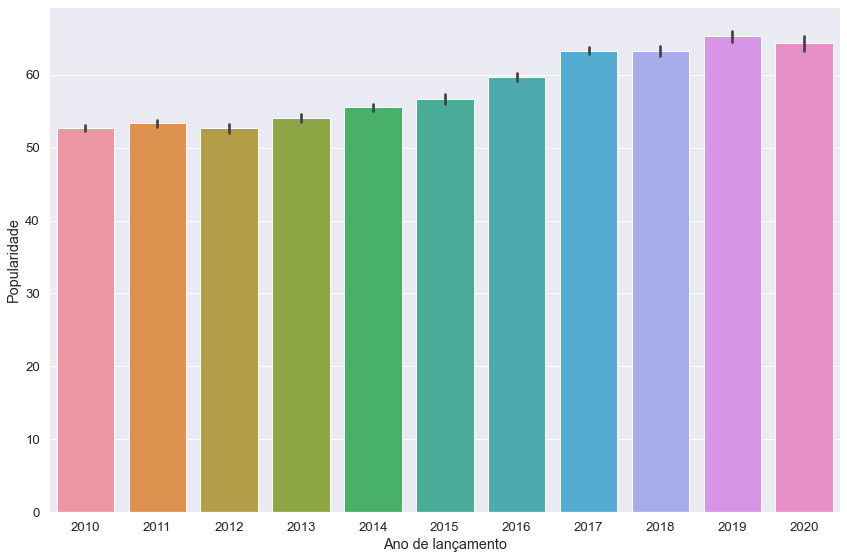

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
b = sns.barplot(x='year', y='popularity', data=df)
b.set(xlabel='Ano de lançamento', ylabel='Popularidade')

plt.tight_layout()
plt.savefig('graficos/popularity_year.png')

## 2.2. Limpeza dos dados

In [ ]:
df.isna().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
dtype: bool

In [ ]:
df.duplicated(subset=['artists', 'name']).sum()

1201

In [ ]:
clean = df.copy()

clean['name'] = clean['name'].str.replace(r'\sand\s', ' & ', case=False)
duplicates = clean.duplicated(subset=['artists', 'name'], keep=False)
most_popular_duplicates = clean[duplicates].groupby(by=['artists', 'name'])['popularity'].idxmax().values
duplicates_to_drop = clean.loc[duplicates & (~clean.index.isin(most_popular_duplicates))].index

clean.drop(duplicates_to_drop, inplace=True)

In [ ]:
print('Antes da limpeza:', df.shape)
print('Após limpeza:', clean.shape)

Antes da limpeza: (21804, 19)
Após limpeza: (20601, 19)


## 2.3. Pré-processamento

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = clean[['valence', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']]

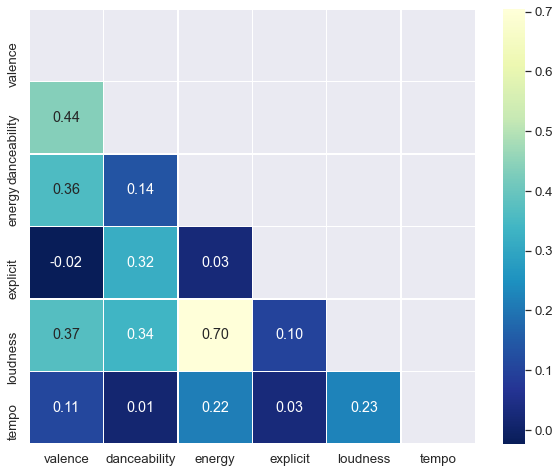

In [ ]:
corr = X.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)

plt.tight_layout()


sns.heatmap(corr, cmap='YlGnBu_r', annot=True, fmt='.2f', linewidths=.5, mask=mask)

plt.savefig('graficos/heatmap_2.png')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = clean[['valence', 'danceability', 'energy', 'explicit', 'loudness', 'tempo']]

scaler = MinMaxScaler()
X_transformed = scaler.fit_transform(X)

X_transformed.shape

(20601, 6)

# 3. Modelos de Aprendizado

## 3.1 Clustering Hierárquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors, NearestCentroid
import scipy.cluster.hierarchy as sch

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sch.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
fancy_dendrogram(sch.linkage(X_transformed, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,)
plt.show()

In [ ]:
agg_silhouettes = []
agg_calinski = []
agg_davies = []

for i in range(2,11):
  print('Fit com', i, 'clusters')
  agg_cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
  agg_cluster.fit(X_transformed)
  agg_silhouettes.append(silhouette_score(X_transformed, agg_cluster.labels_))
  agg_calinski.append(calinski_harabasz_score(X_transformed, agg_cluster.labels_))
  agg_davies.append(davies_bouldin_score(X_transformed, agg_cluster.labels_))

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax[0].plot(range(2,10), agg_silhouettes, c='#2c7fb8')
ax[1].plot(range(2,10), agg_calinski, c='#31a354')
ax[2].plot(range(2,10), agg_davies, c='#c51b8a')

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit(X_transformed)

In [ ]:
np.unique(agg_cluster.labels_, return_counts=True)

In [ ]:
import warnings
from sklearn.exceptions import EfficiencyWarning
warnings.filterwarnings(action='ignore', category=EfficiencyWarning)

## 3.2 Clustering de densidade

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [ ]:
knn = NearestNeighbors(n_neighbors=2, n_jobs=-1)
knn.fit(X_transformed)

In [ ]:
distances, indices = knn.kneighbors(X_transformed)
distances_sorted = np.sort(distances, axis=0)[:,1]
plt.plot(distances_sorted)

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax[0].plot(range(2,10), agg_silhouettes, c='#2c7fb8')
ax[1].plot(range(2,10), agg_calinski, c='#31a354')
ax[2].plot(range(2,10), agg_davies, c='#c51b8a')

In [ ]:
eps_space = np.arange(0, 0.5, 0.05)[1:]

db_silhouettes = []
db_calinski = []
db_davies = []
for i in eps_space:
  print('Fit com eps:', i)
  neighbors_graph = knn.radius_neighbors_graph(X_transformed, radius=i, mode='distance', sort_results=False)
  db_cluster = DBSCAN(eps=i, min_samples=10, metric='precomputed', n_jobs=-1)
  db_cluster.fit(neighbors_graph)

  if len(np.unique(cluster.labels_)) != 1:
    db_silhouettes.append(silhouette_score(X_transformed, db_cluster.labels_))
    db_calinski.append(calinski_harabasz_score(X_transformed, db_cluster.labels_))
    db_davies.append(davies_bouldin_score(X_transformed, db_cluster.labels_))

In [ ]:
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax[0].plot(eps_space, db_silhouettes, c='#2c7fb8')
ax[1].plot(eps_space, db_calinski, c='#31a354')
ax[2].plot(eps_space, db_davies, c='#c51b8a')

In [ ]:
neighbors_graph = knn.radius_neighbors_graph(X_transformed, radius=0.3, mode='distance', sort_results=False)
db_cluster = DBSCAN(eps=0.3, min_samples=10, metric='precomputed', n_jobs=-1)
db_cluster.fit(neighbors_graph)

In [ ]:
np.unique(db_cluster.labels_, return_counts=True)

# 4. Análise dos Resultados

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## 4.1. Clustering hierárquico

In [ ]:
print('Agglomerative Clustering')
print('Silhouette score:', silhouette_score(X_transformed, agg_cluster.labels_))
print('Calinski Harabsz score:', calinski_harabasz_score(X_transformed, agg_cluster.labels_))
print('Davies Bouldin score:', davies_bouldin_score(X_transformed, agg_cluster.labels_))

In [ ]:
df_clusters_agg = clean.copy()
df_clusters_agg.insert(0, 'cluster', agg_cluster.labels_)
df_clusters_agg['cluster'].value_counts()

In [ ]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

for i in range(2):
  for j in range(2):
    sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_agg, ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette='Set1')

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)

colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00']

sns.scatterplot(x='loudness', y='energy', data=df_clusters_agg, hue='cluster', ax=ax[0], linewidth=0, alpha=0.5, palette='Set1')
sns.scatterplot(x='loudness', y='energy', data=df_clusters_agg[df_clusters_agg['cluster'] != 0], ax=ax[1], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

In [ ]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00']

for i in range(2):
  for j in range(2):
    sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_agg[df_clusters_agg['cluster'] != 0], ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

In [ ]:
df_clusters_agg.loc[df_clusters_agg['artists'].str.find('Lana Del Rey') != -1, ['cluster']].value_counts()

Matriz cofenética

In [ ]:
from scipy.spatial.distance import pdist, squareform
distances = pdist(df_transformed, metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix

In [ ]:
fig, axs = plt.subplots(5,2)
fig.set_figheight(10)
fig.set_figwidth(18)
for i in range(5):
  for j in range(2):
    sns.scatterplot(y=dist_matrix[:,0], x=dist_matrix[j*1000+i*1000], ax=axs[i,j], hue = labels,alpha=0.5, palette='Paired')

## 4.2. DBSCAN

In [ ]:
print('DBSCAN')
print('Silhouette score:', silhouette_score(X_transformed, db_cluster.labels_))
print('Calinski Harabsz score:', calinski_harabasz_score(X_transformed, db_cluster.labels_))
print('Davies Bouldin score:', davies_bouldin_score(X_transformed, db_cluster.labels_))

In [ ]:
df_clusters_db = clean.copy()
df_clusters_db.insert(0, 'cluster', db_cluster.labels_)
df_clusters_db['cluster'].value_counts()

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(18)

cols = ['danceability', 'energy', 'tempo', 'loudness']

colors = ['#984ea3', '#377eb8', '#e41a1c', '#ff7f00']

for i in range(2):
  for j in range(2):
    sns.scatterplot(x='valence', y=cols[j*2+i], data=df_clusters_db, ax=axs[i,j], hue='cluster', linewidth=0, alpha=0.5, palette=colors)

In [ ]:
plt.figure(figsize=(8,8))

colors = ['#984ea3', '#377eb8', '#e41a1c', '#ff7f00']

sns.scatterplot(x='loudness', y='energy', data=df_clusters_db, hue='cluster',  linewidth=0, alpha=0.5, palette=colors)

# 5. Conclusão

# Referências Bibliográficas

ablublublé